In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [13]:
df = pd.read_csv("../Data/ml-2/encoded_insights.csv", parse_dates=["date"])
print(df.head())

        date  region  resource_type  usage_cpu  usage_storage  users_active  \
0 2023-01-01       0              2         88           1959           470   
1 2023-01-01       0              1         92           1595           388   
2 2023-01-01       0              0         70            621           414   
3 2023-01-01       3              2         60           1982           287   
4 2023-01-01       3              1         85           1371           351   

   economic_index  cloud_market_demand  holiday  storage_allocated  \
0          104.97                 0.99        1               1992   
1          104.97                 0.99        1               1992   
2          104.97                 0.99        1               1995   
3          104.97                 0.99        1               1986   
4          104.97                 0.99        1               1966   

   storage_efficiency  year  month  day  weekday  
0               98.34  2023      1    1        6  
1 

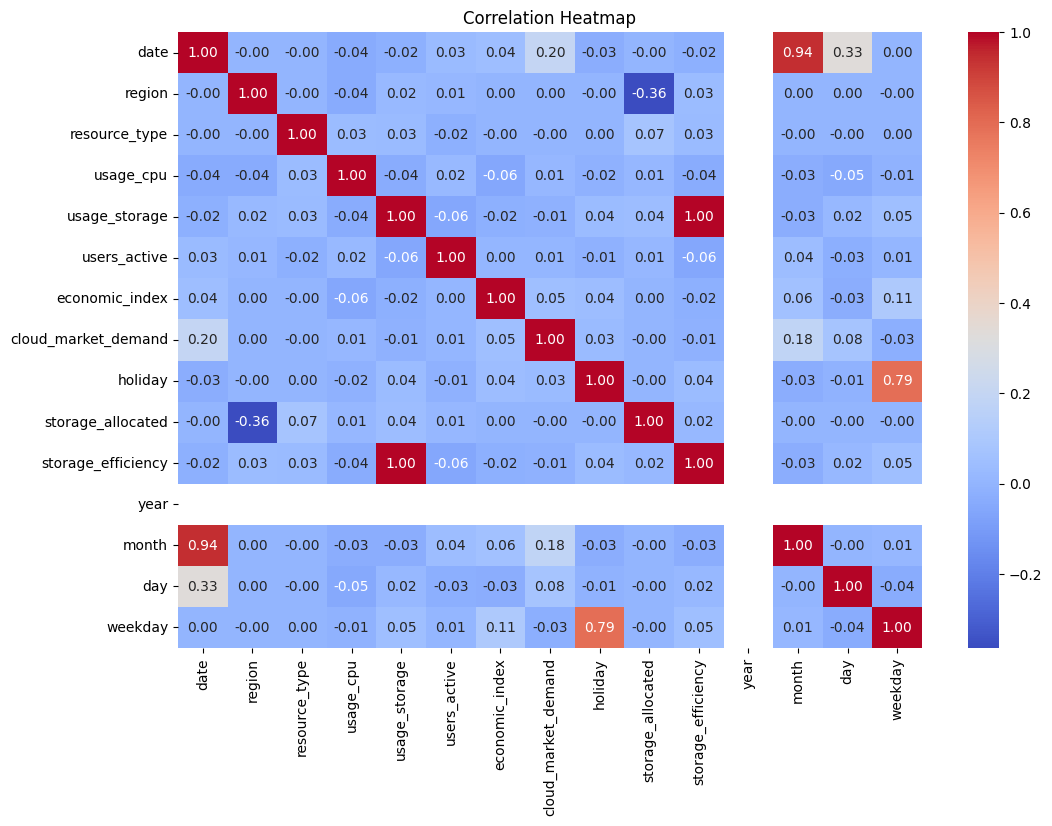

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


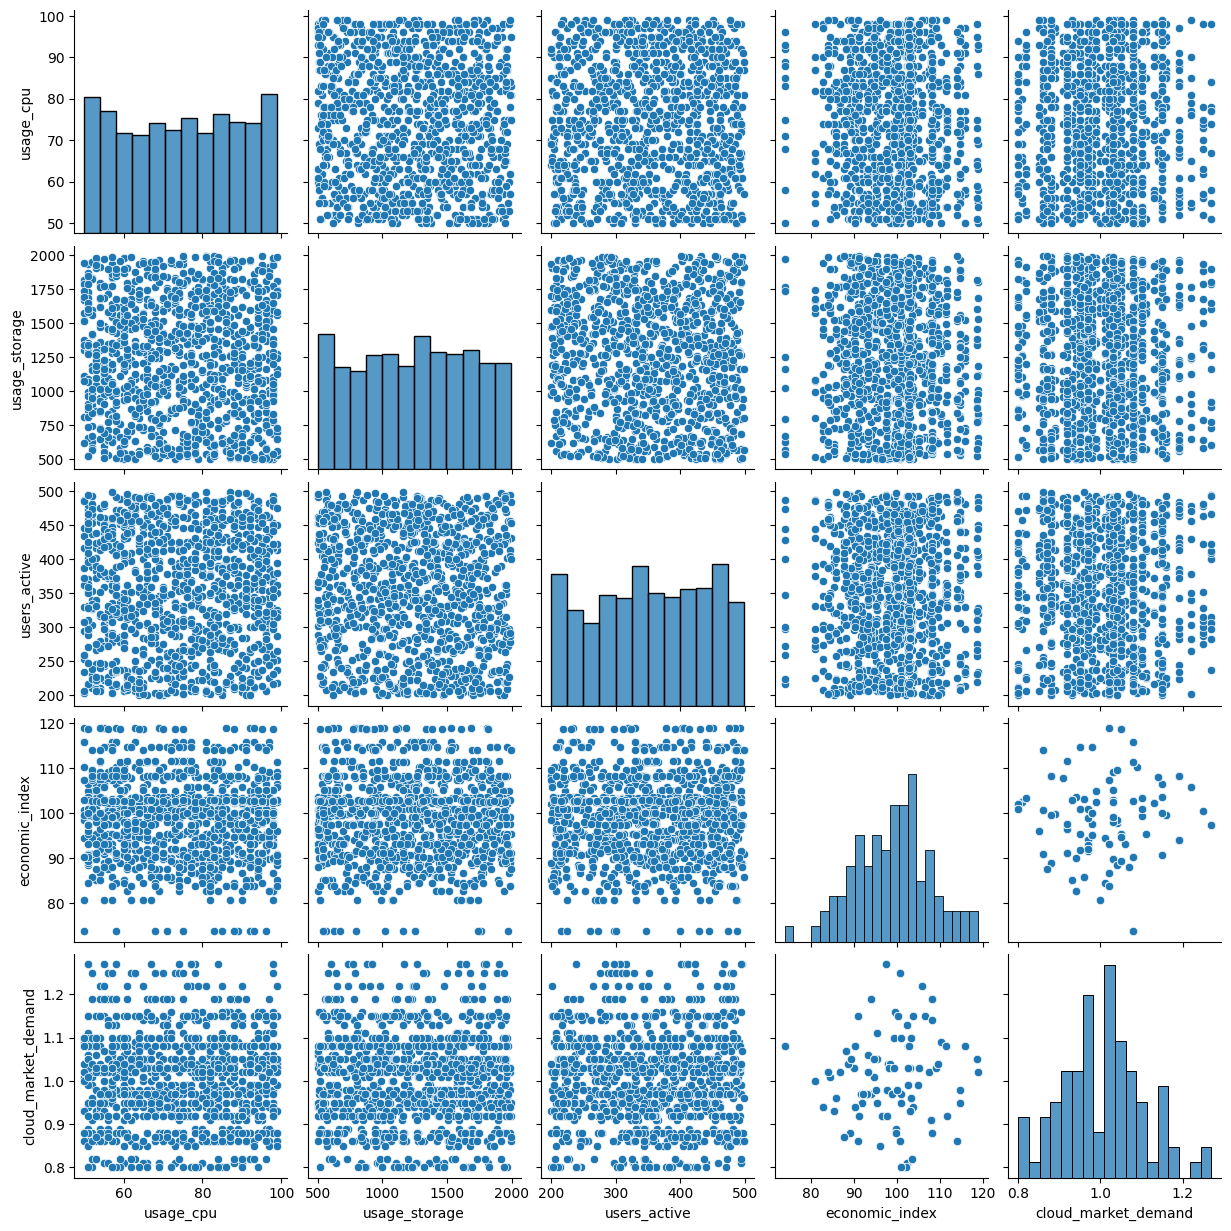

In [15]:
sns.pairplot(df[["usage_cpu","usage_storage","users_active","economic_index","cloud_market_demand"]])
plt.show()


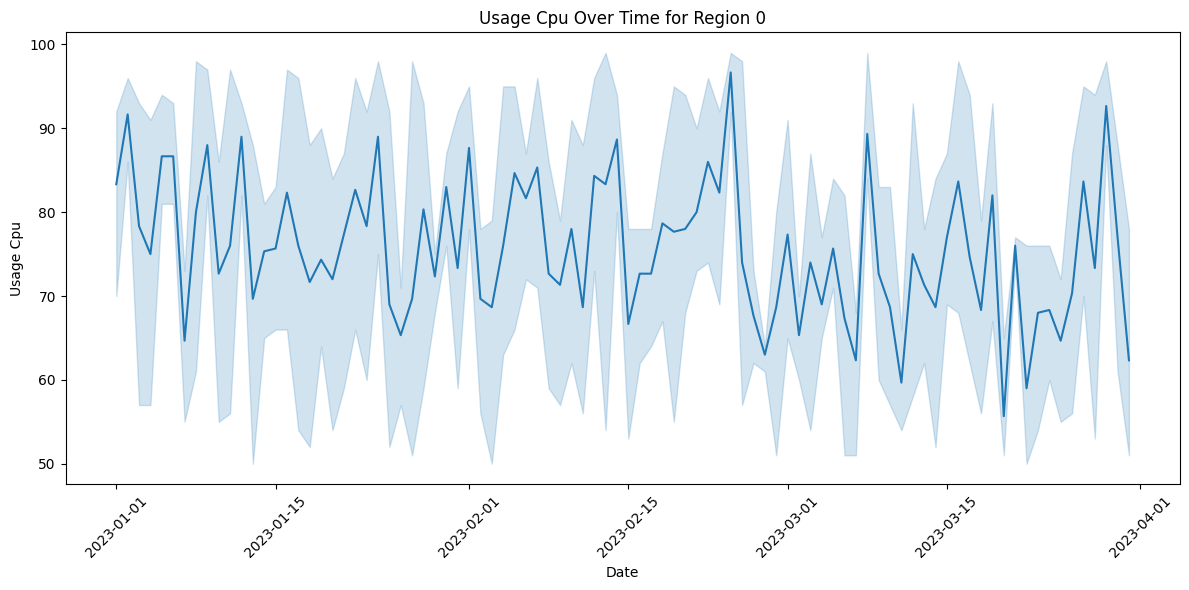

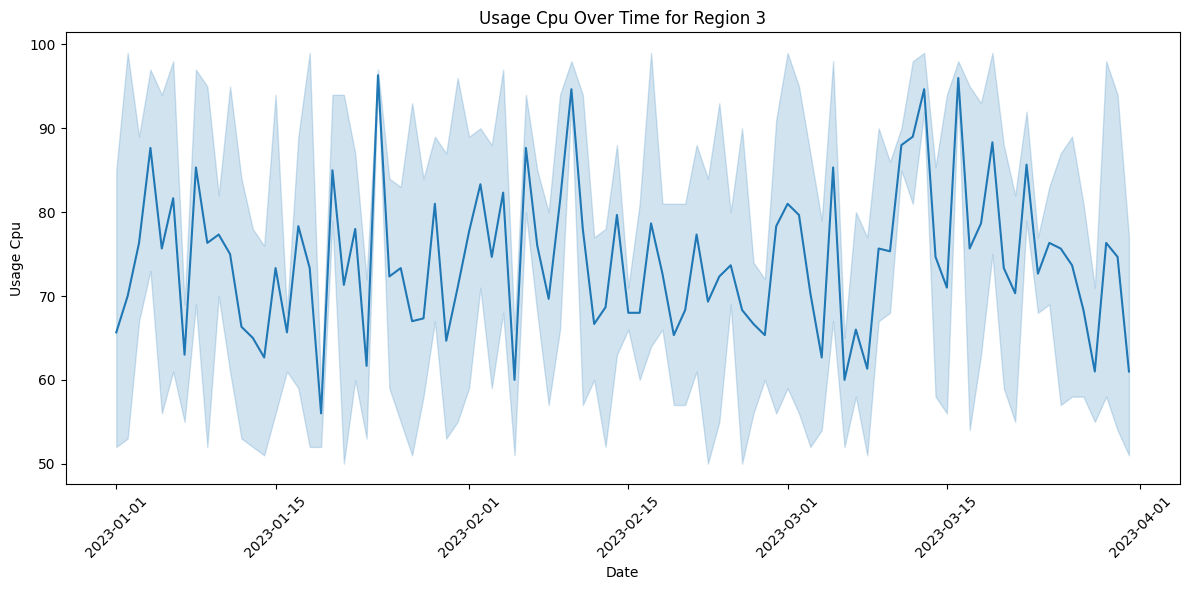

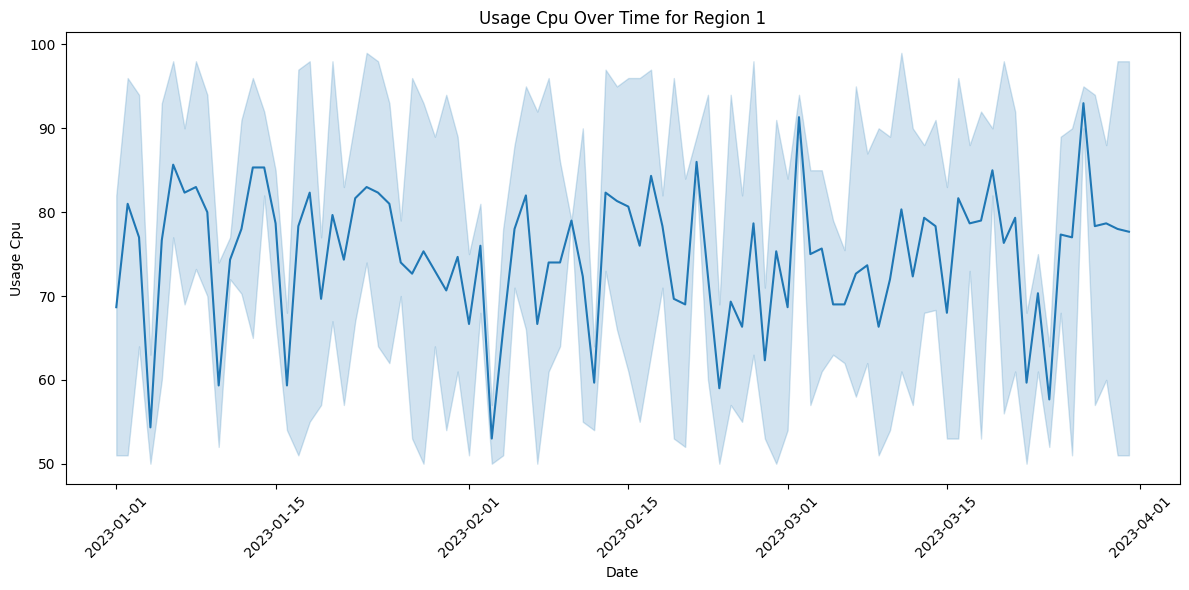

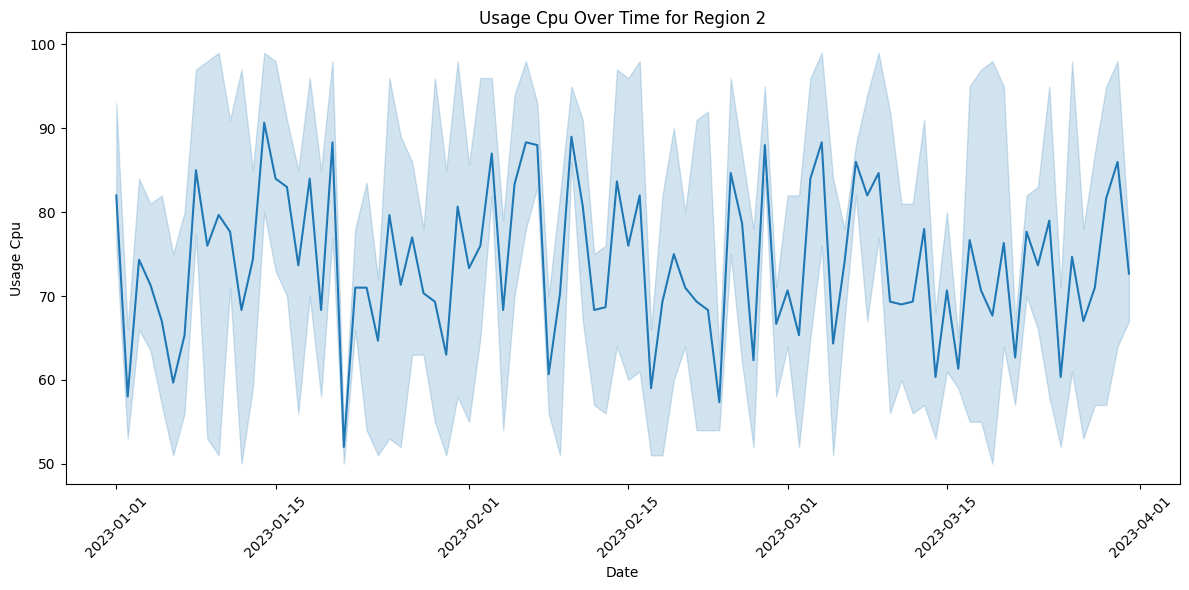

In [16]:

regions = df['region'].unique()
resource_cols = ['usage_cpu']

for region in regions:
    region_df = df[df['region'] == region]
    for col in resource_cols:
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=region_df, x='date', y=col)
        plt.title(f'{col.replace("_", " ").title()} Over Time for Region {region}')
        plt.xlabel('Date')
        plt.ylabel(col.replace("_", " ").title())
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

Decomposition for Region 0 - Usage Cpu


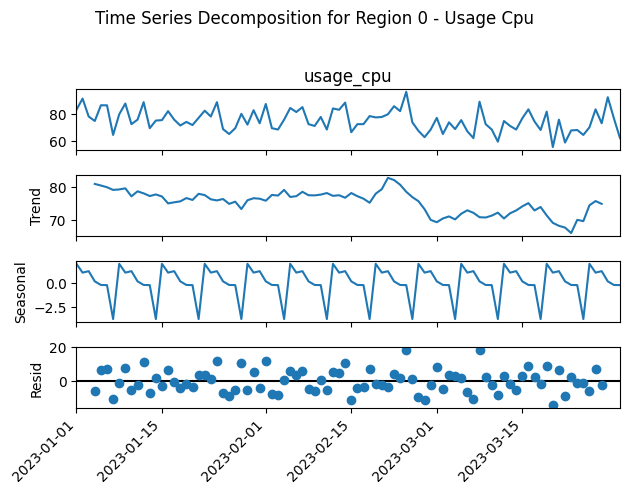

Decomposition for Region 0 - Usage Storage


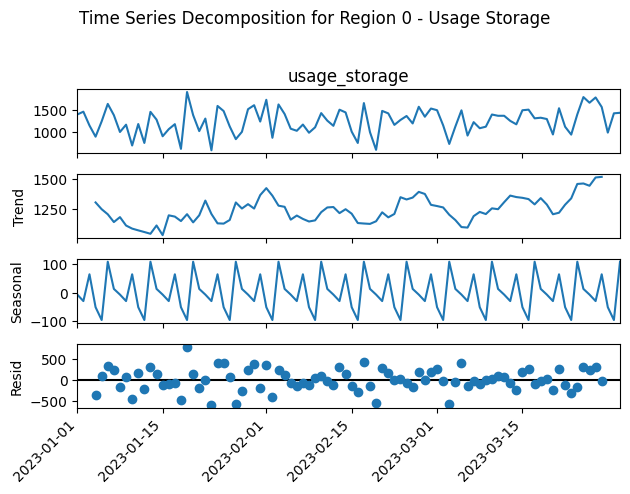

Decomposition for Region 0 - Users Active


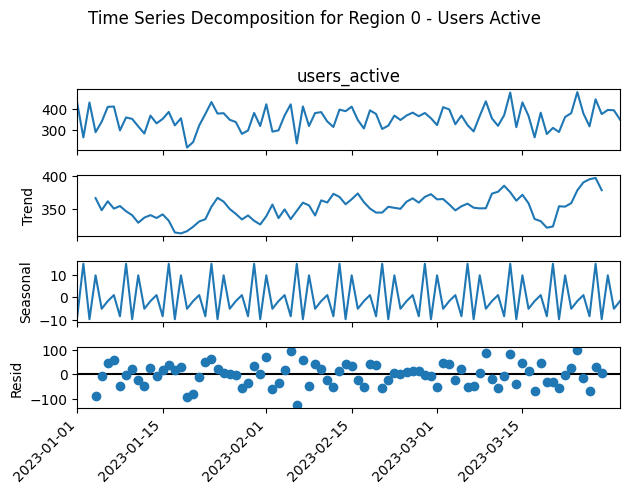

Decomposition for Region 3 - Usage Cpu


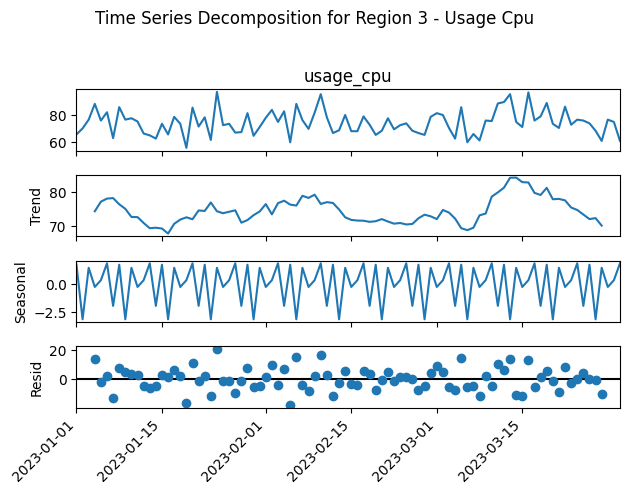

Decomposition for Region 3 - Usage Storage


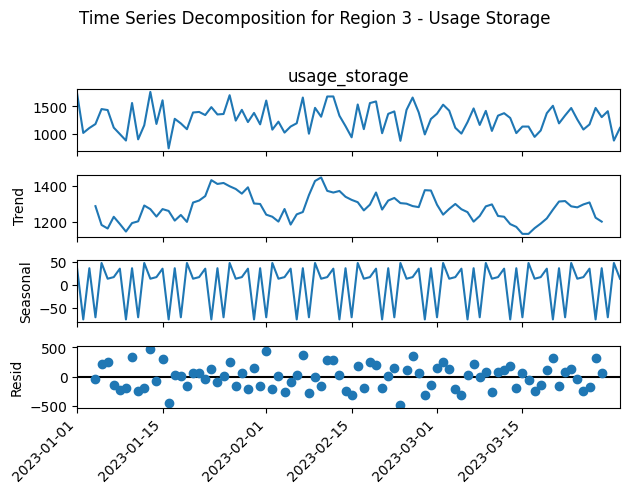

Decomposition for Region 3 - Users Active


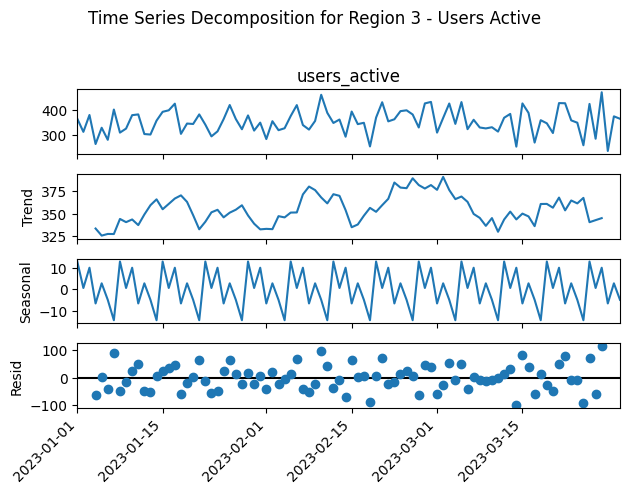

Decomposition for Region 1 - Usage Cpu


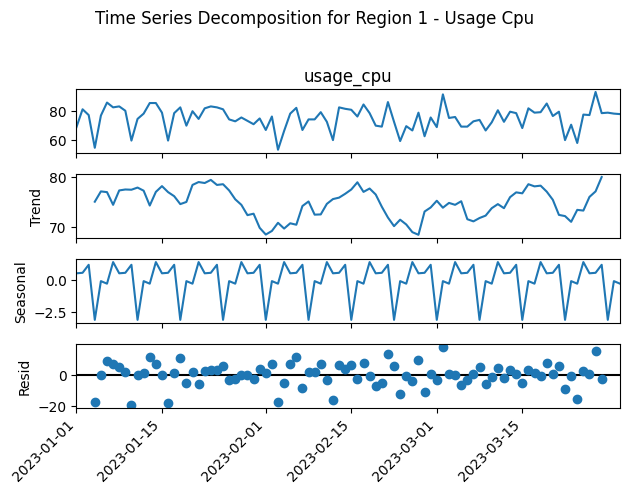

Decomposition for Region 1 - Usage Storage


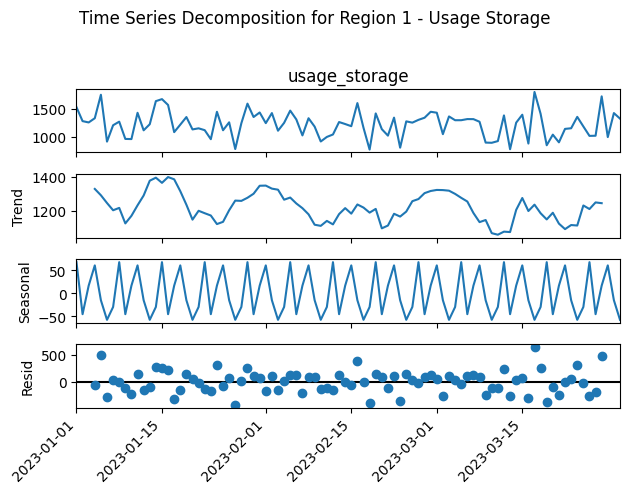

Decomposition for Region 1 - Users Active


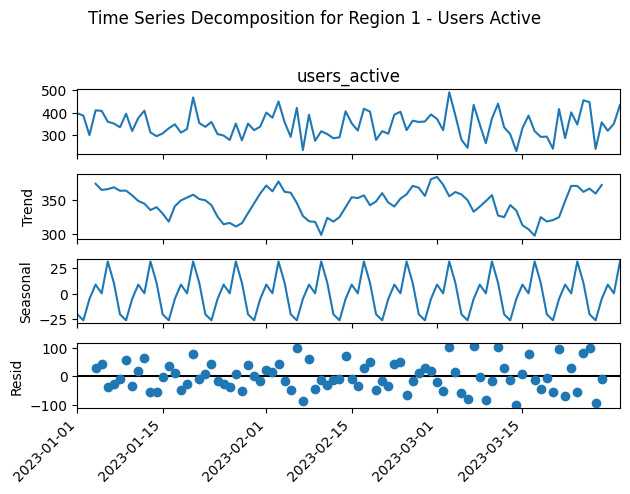

Decomposition for Region 2 - Usage Cpu


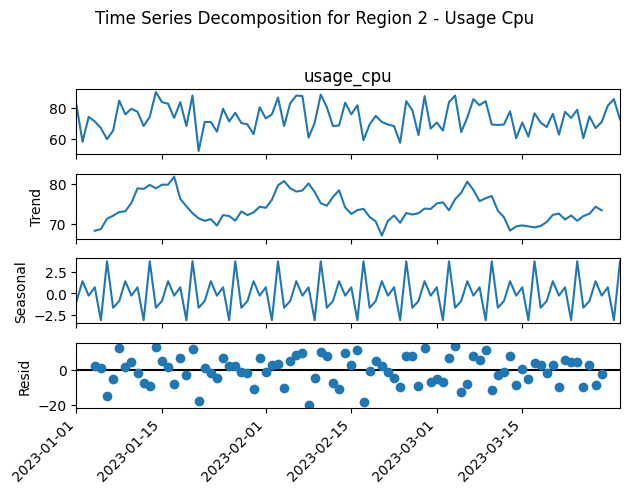

Decomposition for Region 2 - Usage Storage


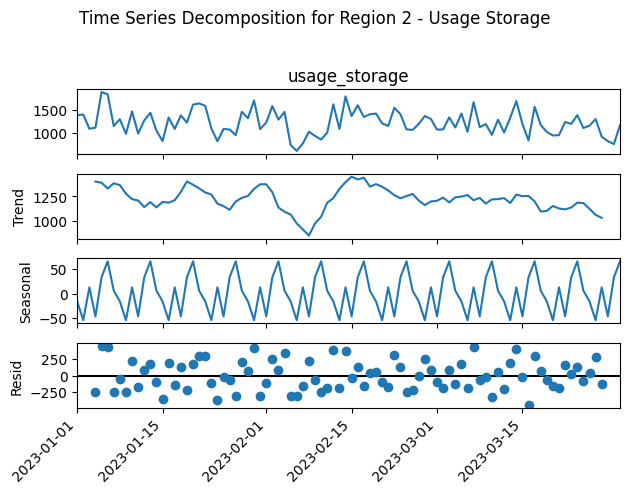

Decomposition for Region 2 - Users Active


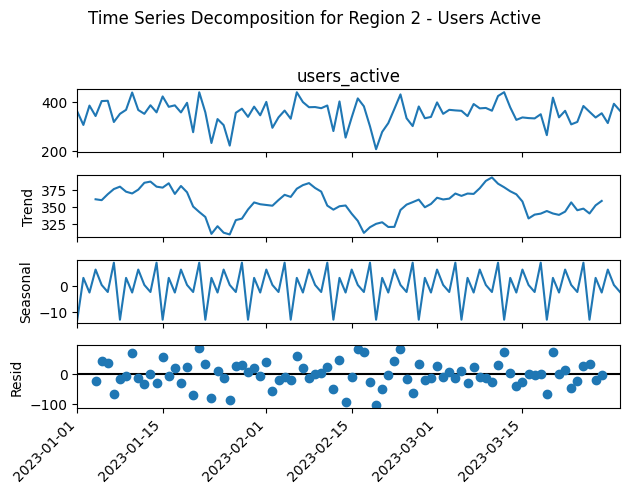

In [18]:

regions = df['region'].unique()
resource_cols = ['usage_cpu','usage_storage','users_active']

for region in regions:
    region_df = df[df['region'] == region].set_index('date').sort_index()

    region_df = region_df.groupby('date').mean()

    for col in resource_cols:
        print(f"Decomposition for Region {region} - {col.replace('_', ' ').title()}")
        try:
            region_ts = region_df[col].asfreq('D')
            decomposition = seasonal_decompose(region_ts.dropna(), model='additive')

            fig = decomposition.plot()
            fig.suptitle(f'Time Series Decomposition for Region {region} - {col.replace("_", " ").title()}', y=1.02)

            for ax in fig.get_axes():
                ax.xaxis.set_major_locator(mdates.AutoDateLocator())
                ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
                plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Could not perform decomposition for Region {region} - {col.replace('_', ' ').title()}: {e}")